**Anna Smith**

**GitHub username: acs-233**

**Imperial College London - MSc EDSML - IRP**
# **Land Use Regression Modelling for $\text{BECO}_2\text{N}$ data**

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from bayareaco2.models.data import load_Xy
from bayareaco2.models.data import fit_scaler, scale_features
from bayareaco2.models.data import feature_selection
from bayareaco2.models.data import plot_corr

In [3]:
from bayareaco2.models.ols import OLS_Model

## Reading in Data

In [4]:
# Load data
X, y = load_Xy()

Dropping 18 features with all zero data
Number of observations: 17389
Number of features: 105


In [5]:
# Standardizing the data
scaler = fit_scaler(X)
X_scaled = scale_features(scaler, X)

In [6]:
# Splitting data: 80% training, 20% testing
full_X_train, X_test, full_y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Splitting training data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(full_X_train, full_y_train, test_size=0.2, random_state=42)

In [8]:
# Printing the length of the datasets
print(f"Full training set length: {len(full_X_train)}")
print(f"Test set length: {len(X_test)}")
print(f"Training set length: {len(X_train)}")
print(f"Validation set length: {len(X_val)}")

Full training set length: 13911
Test set length: 3478
Training set length: 11128
Validation set length: 2783


## Feature Selection

In [9]:
# Feature selection
selected_features = feature_selection(X_train, y_train)

32 features selected with Spearman's correlation coefficient ≥ 0.03
11 features selected with VIF < 3: 

11 features selected: 

temp
pressure
rh
Trees_area_50m
total_road_length_1000m
total_road_length_200m
Built_Area_area_2000m
total_AADT_3000m
Flooded_Vegetation_area_1000m
Industrial_area_5000m
avg_ndvi_50m


In [10]:
# Filtering the datasets using the selected features
X_scaled = X_scaled[selected_features]
X_train = X_train[selected_features]
X_val = X_val[selected_features]
full_X_train = full_X_train[selected_features]
X_test = X_test[selected_features]

## Training LUR (OLS)

In [11]:
# Instantiating the model
train_model = OLS_Model()

In [12]:
# Fitting the model
train_model.fit(X_train, y_train);

R²: 0.35
Adjusted R²: 0.35
Mean Squared Error (MSE): 237.78
Root Mean Squared Error (RMSE): 15.42
Mean Absolute Error (MAE): 11.82


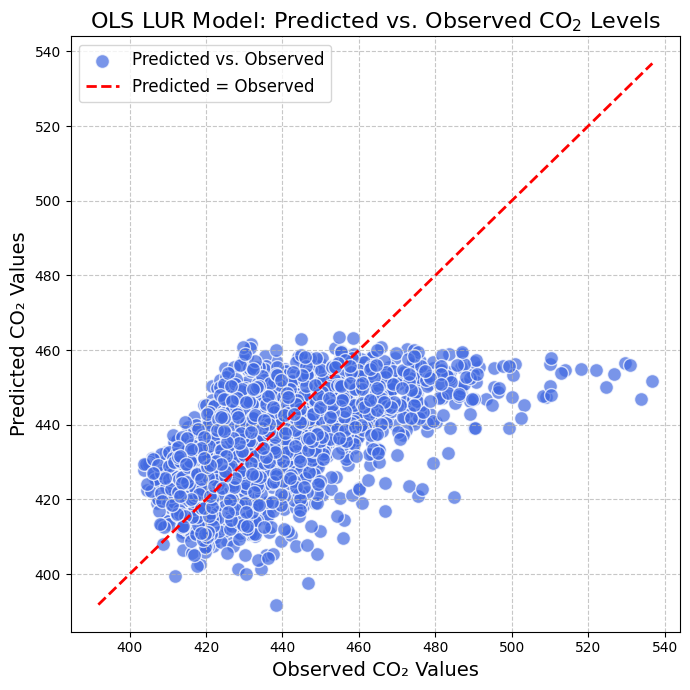

In [13]:
# Evaluating the model
train_lur_results = train_model.evaluate(X_val, y_val)

In [14]:
# Investigating the relationships between the features and the target
train_model.feature_stats(X_train, y_train)

,Feature,Coefficient,Standard Error,p-Value,VIF,Partial R²
0,temp,-7.747254,0.168318,0.000000e+00,1.255625,0.160076
1,pressure,10.078146,0.240971,0.000000e+00,2.470654,0.135962
2,rh,-3.025090,0.165919,3.314754e-73,1.201932,0.029036
3,Trees_area_50m,5.500648,0.225243,2.379309e-128,2.136001,0.050919
4,total_road_length_1000m,-0.861939,0.193787,8.756419e-06,1.652239,0.001777
5,total_road_length_200m,0.407954,0.183054,2.586053e-02,1.457844,0.000447
6,Built_Area_area_2000m,2.011851,0.209628,9.966551e-22,1.927268,0.008218
7,total_AADT_3000m,0.332320,0.179386,6.397449e-02,1.399811,0.000309
8,Flooded_Vegetation_area_1000m,-0.544905,0.167081,1.112248e-03,1.222075,0.000956
9,Industrial_area_5000m,-1.876762,0.186684,1.122890e-23,1.534852,0.009010


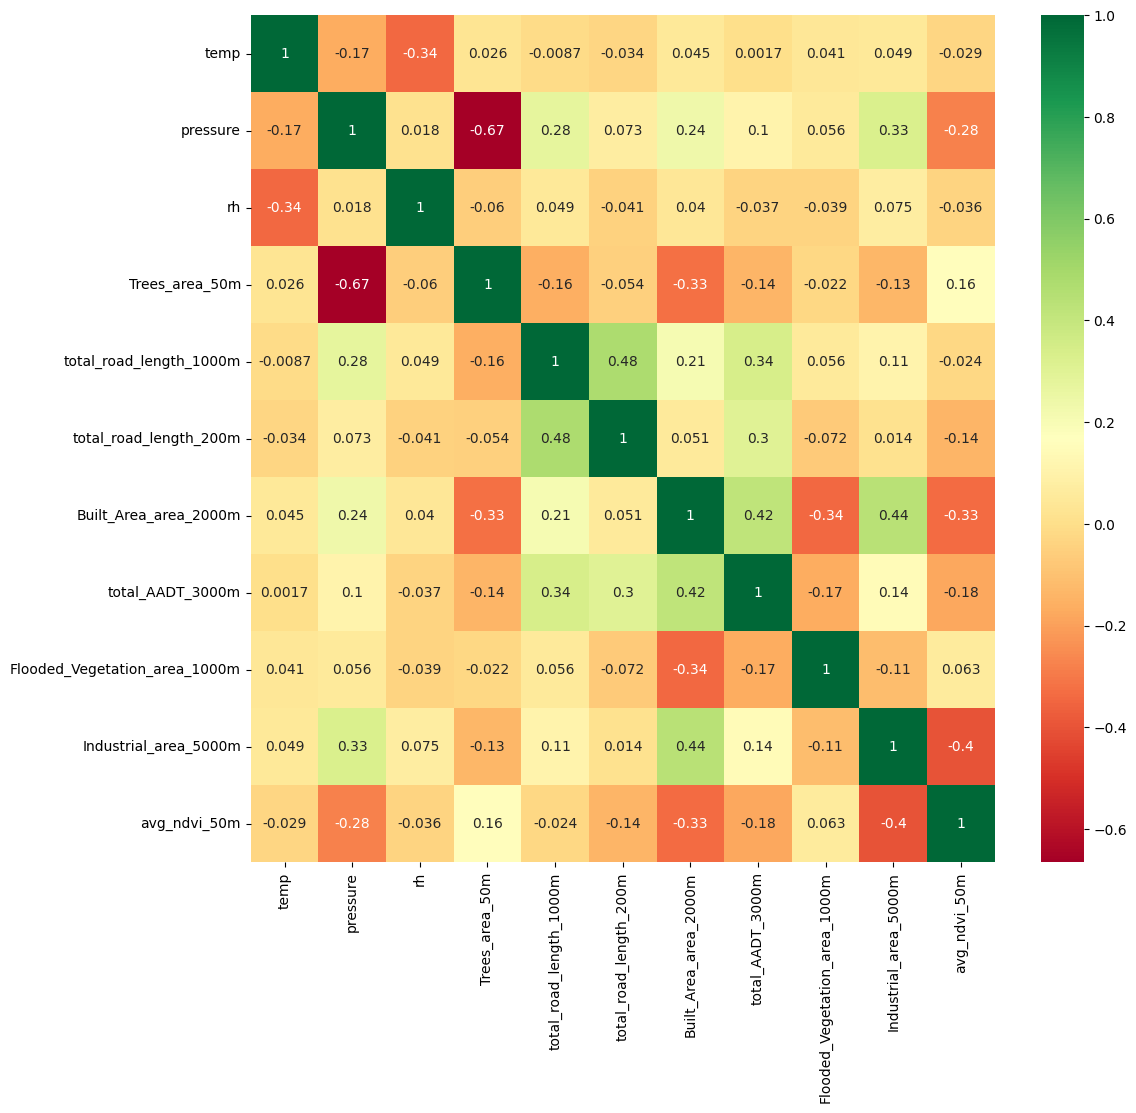

In [17]:
plot_corr(X_train)

In [18]:
# Cross-validating the model
cv_train_lur_results = train_model.cross_validate(full_X_train, full_y_train)

Cross-Validation Mean Metrics:
R²: 0.34
Adjusted R²: 0.33
Mean Squared Error (MSE): 249.50
Root Mean Squared Error (RMSE): 15.79
Mean Absolute Error (MAE): 11.99


## Final LUR model

In [19]:
# Instantiating the final model
final_model = OLS_Model()

In [20]:
# Fitting the final model using the full training set
final_model.fit(full_X_train, full_y_train);

R²: 0.34
Adjusted R²: 0.34
Mean Squared Error (MSE): 250.02
Root Mean Squared Error (RMSE): 15.81
Mean Absolute Error (MAE): 12.04


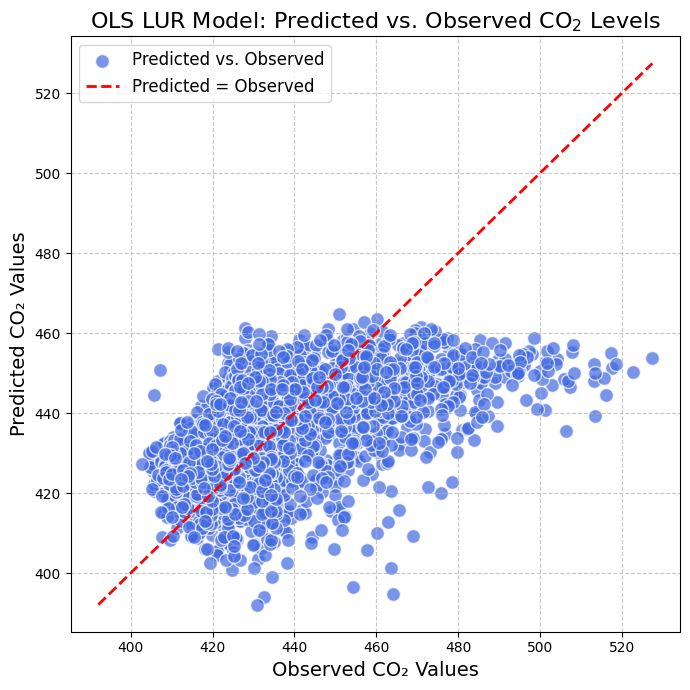

In [21]:
# Evaluating the final model reserved test set
final_ols_results = final_model.evaluate(X_test, y_test);

In [22]:
# Investigating the relationships between the features and the target
final_model.feature_stats(full_X_train, full_y_train).round(2)

,Feature,Coefficient,Standard Error,p-Value,VIF,Partial R²
0,temp,-7.72,0.15,0.00,1.25,0.16
1,pressure,10.00,0.21,0.00,2.52,0.14
2,rh,-2.98,0.15,0.00,1.20,0.03
3,Trees_area_50m,5.46,0.20,0.00,2.17,0.05
4,total_road_length_1000m,-0.78,0.17,0.00,1.66,0.00
5,total_road_length_200m,0.34,0.16,0.04,1.47,0.00
6,Built_Area_area_2000m,1.87,0.19,0.00,1.93,0.01
7,total_AADT_3000m,0.34,0.16,0.03,1.40,0.00
8,Flooded_Vegetation_area_1000m,-0.62,0.15,0.00,1.22,0.00
9,Industrial_area_5000m,-1.91,0.17,0.00,1.54,0.01


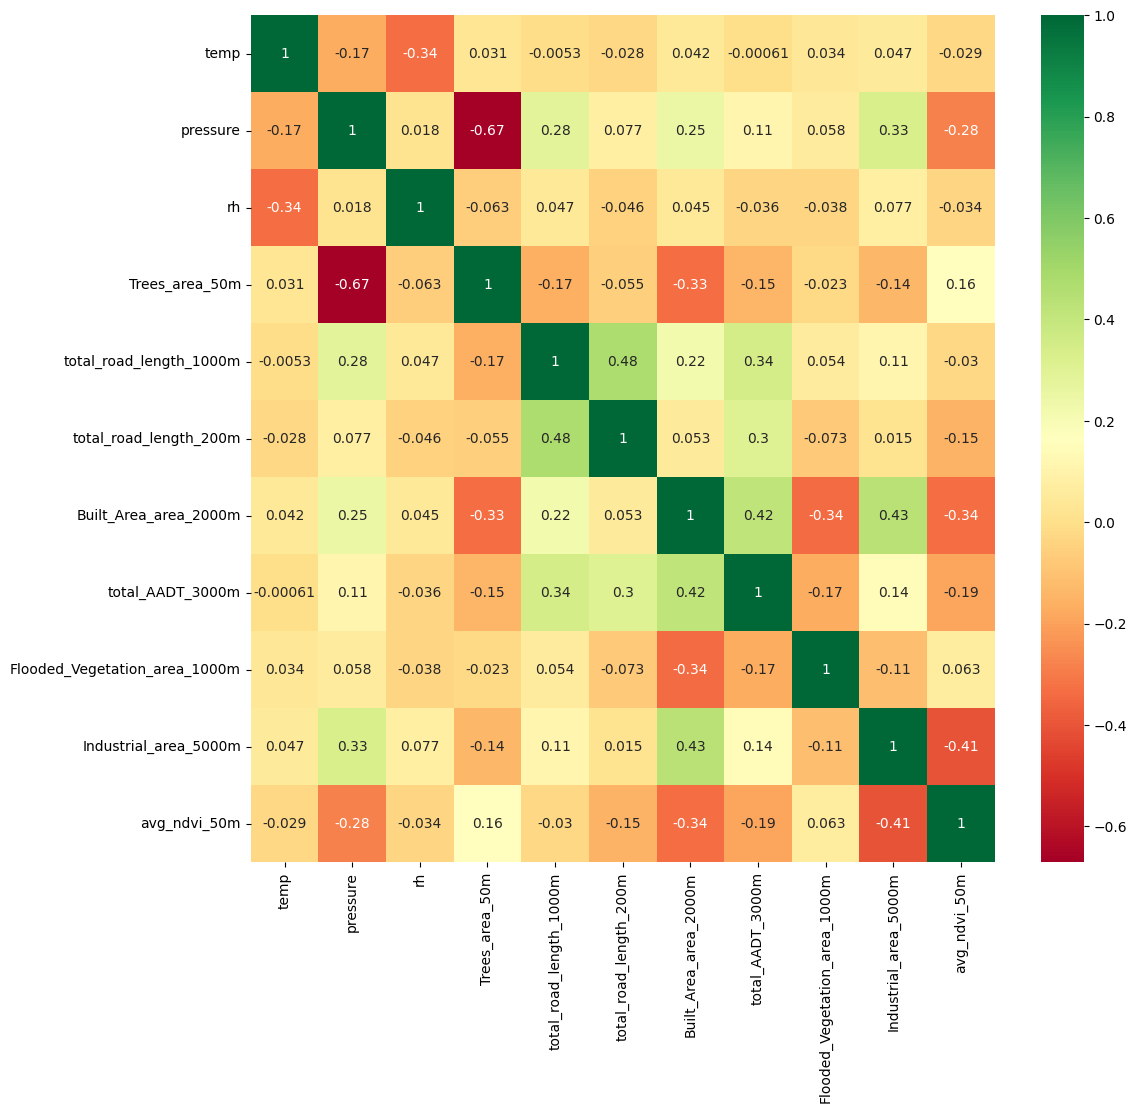

In [23]:
plot_corr(full_X_train)

In [24]:
# Cross-validating the final model
final_model.cross_validate(X_scaled, y);

Cross-Validation Mean Metrics:
R²: 0.34
Adjusted R²: 0.34
Mean Squared Error (MSE): 249.57
Root Mean Squared Error (RMSE): 15.80
Mean Absolute Error (MAE): 11.99


## Evaluating Central Test Nodes

Overall Performance Metrics:
R²: 0.31
Mean Squared Error (MSE): 366.05
Root Mean Squared Error (RMSE): 19.13
Mean Absolute Error (MAE): 15.47 



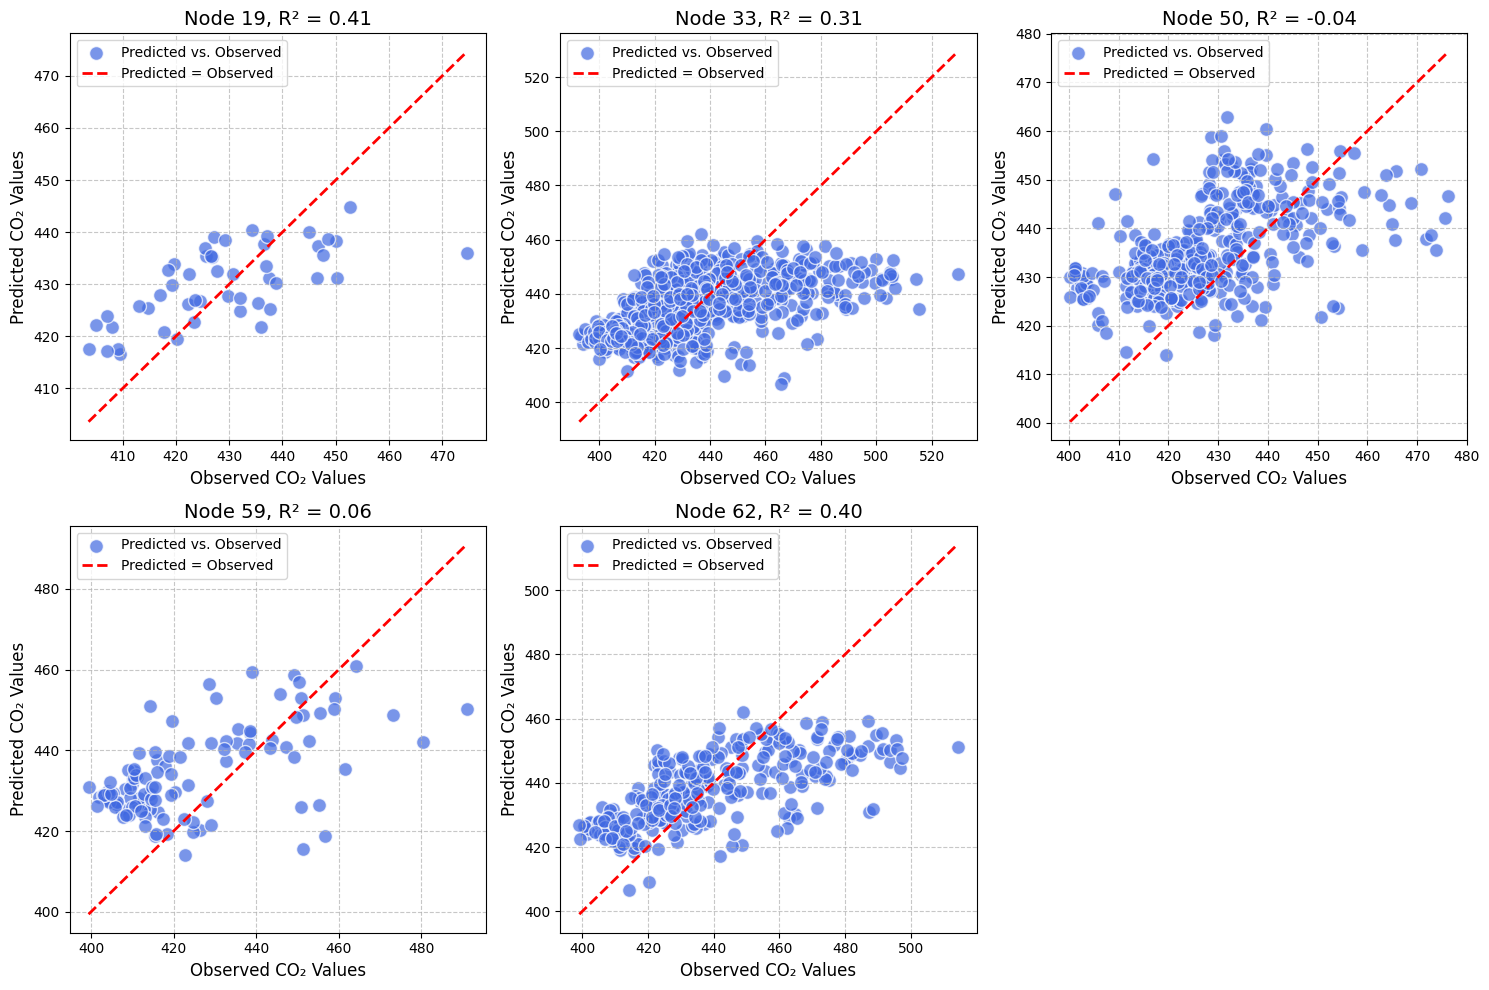

In [25]:
# Evaluating the model performance on central test nodes
central_node_metrics, central_overall_metrics = final_model.evaluate_test_nodes(selected_features, scaler, X.columns, nodes='central')

## Evaluating Fringe Test Nodes

Overall Performance Metrics:
R²: -0.69
Mean Squared Error (MSE): 404.76
Root Mean Squared Error (RMSE): 20.12
Mean Absolute Error (MAE): 17.24 



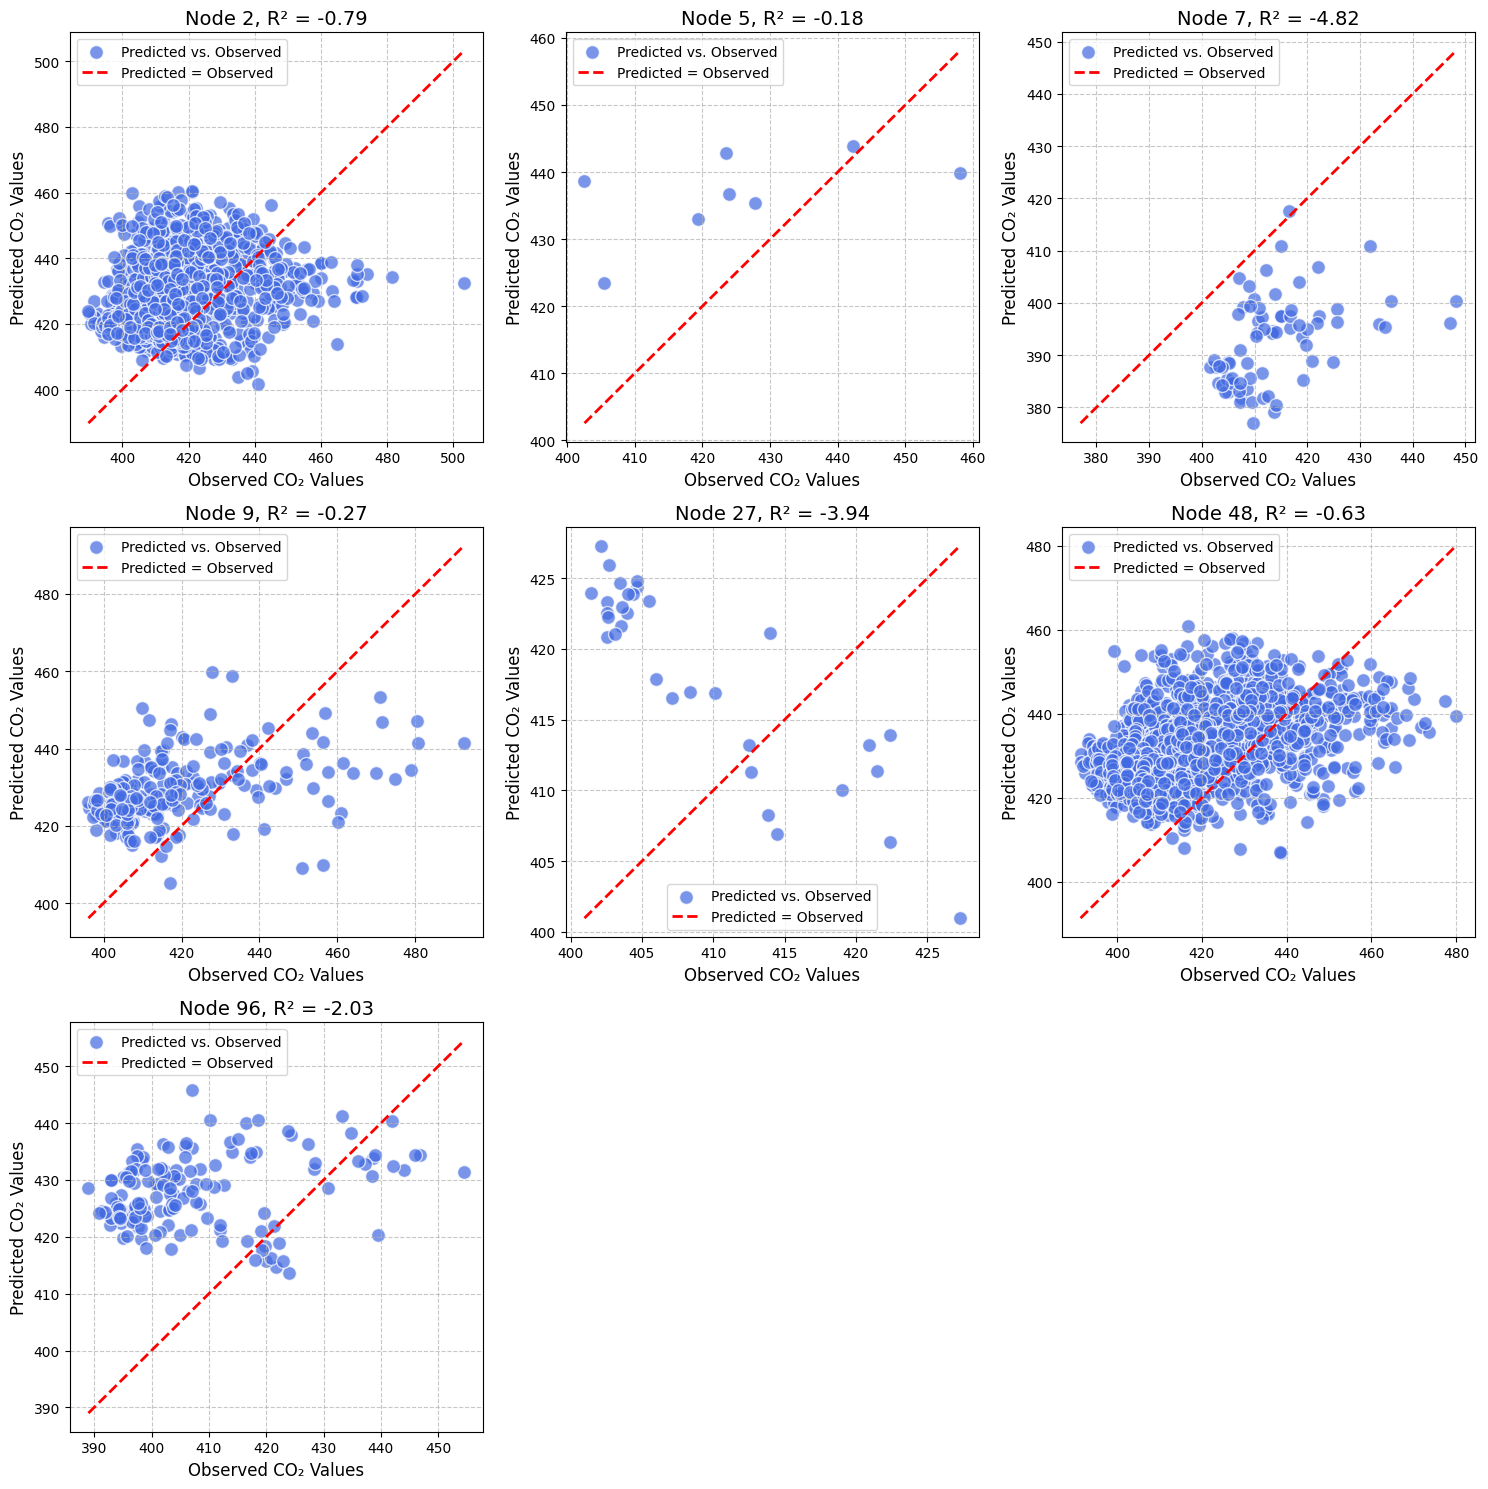

In [26]:
# Evaluating the model performance on fringe test nodes
fringe_node_metrics, fringe_overall_metrics = final_model.evaluate_test_nodes(selected_features, scaler, X.columns, nodes='fringe')

## Node Map

In [27]:
# Creating node map and individual node evaluation dataframe
node_eval_df, node_map = final_model.make_node_map(full_X_train, selected_features, scaler, X.columns)

In [28]:
# Viewing the node map
node_map

In [29]:
# Viewing the node evaluation dataframe
node_eval_df

,node_id,n,R²,MSE,RMSE,MAE
0,2,1185,-0.79,396.33,19.91,16.54
1,3,299,0.04,260.72,16.15,12.54
2,4,110,-0.74,598.62,24.47,18.58
3,5,8,-0.18,341.87,18.49,15.89
4,7,73,-4.82,543.83,23.32,21.23
...,...,...,...,...,...,...
60,96,151,-2.03,596.80,24.43,22.16
61,125,43,-0.06,247.35,15.73,13.34
62,280,114,0.42,141.13,11.88,7.70
63,281,181,0.50,156.92,12.53,9.57
